In [14]:
import scienceplots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors
import pandas as pd
from sklearn.decomposition import PCA

plt.style.use("science")

In [3]:
X = np.load("../data/normalised_objs.npy")
decoded = np.load("../data/decoded_objs.npy")
encoded = np.load("../data/encoded_objs.npy")
recon_losses = np.sum((X - decoded)**2, axis=1)

In [7]:
data = pd.read_csv("../../dp03/dp03_objects.csv")

clean_objs = data.dropna()
clean_objs = clean_objs.drop(columns=["ssObjectId", "fullDesignation", "q2", "e2", "Unnamed: 0"])

PCA

In [9]:
pca = PCA(n_components = 3).fit_transform(
    encoded
)

In [10]:
threshold = 99.99

/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_18907/3419501016.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


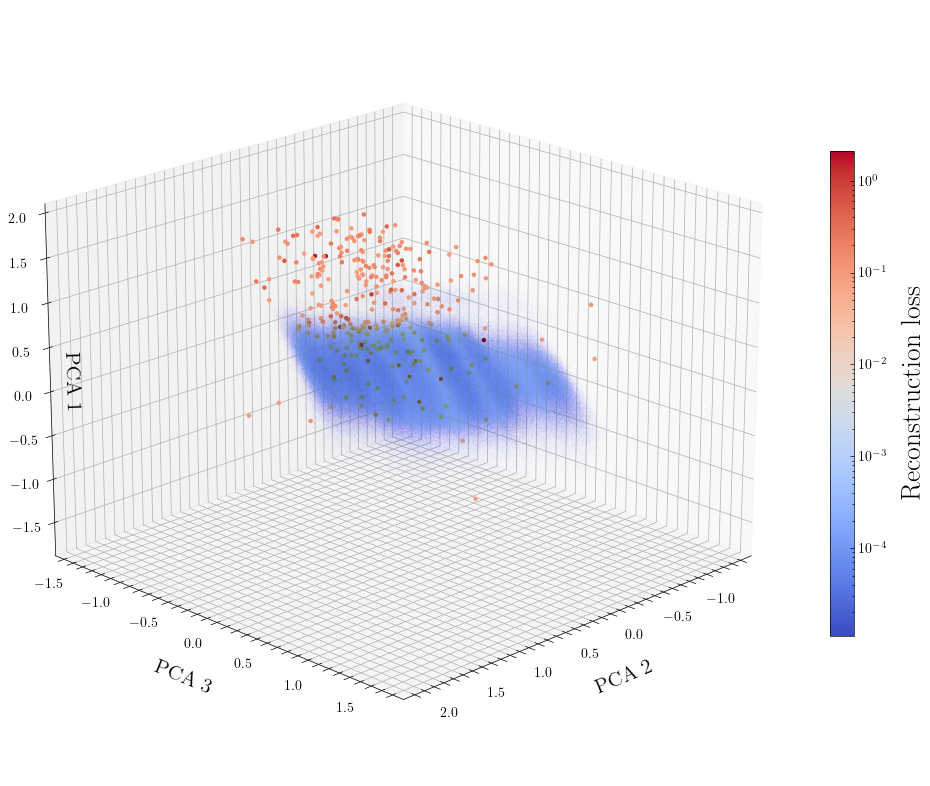

In [11]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(pca[:, 1], pca[:, 2], zs=pca[:, 0], zdir='y',alpha=.05,
    s=.001,
    marker="o",
    c=recon_losses,
    cmap="coolwarm", norm=colors.LogNorm(vmin=recon_losses.min(), vmax=recon_losses.max()))

g = ax.scatter(
    pca[:, 1][recon_losses > np.percentile(recon_losses, threshold)],
    pca[:, 2][recon_losses > np.percentile(recon_losses, threshold)],
    zs=pca[:, 0][recon_losses > np.percentile(recon_losses, threshold)],
    alpha=1,
    s=5,
    zdir='y',
    c=recon_losses[recon_losses > np.percentile(recon_losses, threshold)],
    cmap="coolwarm",
    norm=colors.LogNorm(vmin=recon_losses.min(), vmax=recon_losses.max())
)
ax.view_init(elev=20., azim=45, roll=0)

ax.set_xlabel("PCA 2", fontsize=15, labelpad=10)
ax.set_ylabel("PCA 3", fontsize=15, labelpad=10)
ax.set_zlabel("PCA 1", fontsize=15, labelpad=-30)

ax.grid(True)
ax.set_facecolor("white")

plt.tight_layout()

cbar = plt.colorbar(g, shrink=.5)
cbar.ax.set_ylabel('Reconstruction loss', fontsize=20, labelpad=10)
plt.tight_layout()
plt.savefig("anom_map_3d.png", dpi=300)
plt.show()

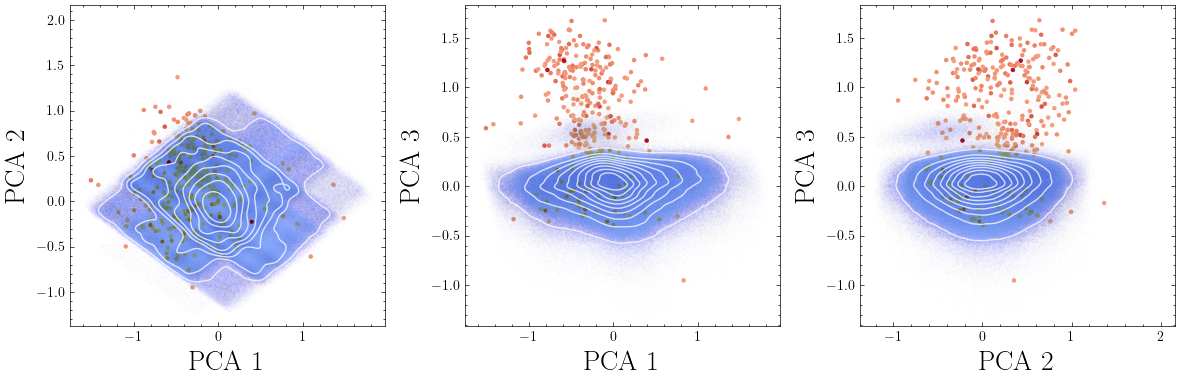

In [17]:
fig, axs = plt.subplots(1, 3, figsize = (12, 4))

axs[0].scatter(
        pca[:, 0][recon_losses > np.percentile(recon_losses, threshold)], 
        pca[:, 1][recon_losses > np.percentile(recon_losses, threshold)], 
        s=5, 
        alpha=1, 
        c=recon_losses[recon_losses > np.percentile(recon_losses, threshold)],
        cmap="coolwarm", 
        norm=colors.LogNorm(vmin=recon_losses.min(), vmax=recon_losses.max()),
)

axs[0].scatter(
    pca[:, 0][recon_losses < np.percentile(recon_losses, 99.99)],
    pca[:, 1][recon_losses < np.percentile(recon_losses, 99.99)],
    alpha=.05,
    s=.001,
    marker="o",
    c=recon_losses[recon_losses < np.percentile(recon_losses, 99.99)],
    cmap="coolwarm",
    norm=colors.LogNorm(vmin=recon_losses.min(), vmax=recon_losses.max())
)
sns.kdeplot( 
    x=pca[:, 0][recon_losses < np.percentile(recon_losses, 99.99)], 
    y=pca[:, 1][recon_losses < np.percentile(recon_losses, 99.99)], 
    fill=False, 
    ax = axs[0],
    color = (1, 1, 1, 0.75)
)

axs[0].set_xlabel("PCA 1", fontsize=20, labelpad=5)
axs[0].set_ylabel("PCA 2", fontsize=20, labelpad=5)


axs[1].scatter(
        pca[:, 0][recon_losses > np.percentile(recon_losses, threshold)], 
        pca[:, 2][recon_losses > np.percentile(recon_losses, threshold)], 
        s=5, 
        alpha=1, 
        c=recon_losses[recon_losses > np.percentile(recon_losses, threshold)],
        cmap="coolwarm", 
        norm=colors.LogNorm(vmin=recon_losses.min(), vmax=recon_losses.max()),
        #label=r"Top .01$\%$ outliers"
)
axs[1].scatter(
    pca[:, 0][recon_losses < np.percentile(recon_losses, threshold)],
    pca[:, 2][recon_losses < np.percentile(recon_losses, threshold)],
    alpha=.05,
    s=.001,
    marker="o",
    c=recon_losses[recon_losses < np.percentile(recon_losses, threshold)],
    cmap="coolwarm",
    norm=colors.LogNorm(vmin=recon_losses.min(), vmax=recon_losses.max())
)
sns.kdeplot( 
    x=pca[:, 0][recon_losses < np.percentile(recon_losses, threshold)], 
    y=pca[:, 2][recon_losses < np.percentile(recon_losses, threshold)], 
    fill=False, 
    ax = axs[1],
    color = (1, 1, 1, 0.75)
)

axs[1].set_xlabel("PCA 1", fontsize=20, labelpad=5)
axs[1].set_ylabel("PCA 3", fontsize=20, labelpad=5)


axs[2].scatter(
        pca[:, 1][recon_losses > np.percentile(recon_losses, threshold)], 
        pca[:, 2][recon_losses > np.percentile(recon_losses, threshold)], 
        s=5, 
        alpha=1, 
        c=recon_losses[recon_losses > np.percentile(recon_losses, threshold)],
        cmap="coolwarm", 
        norm=colors.LogNorm(vmin=recon_losses.min(), vmax=recon_losses.max()),
        #label=r"Top .01$\%$ outliers"
)
axs[2].scatter(
    pca[:, 1][recon_losses < np.percentile(recon_losses, threshold)],
    pca[:, 2][recon_losses < np.percentile(recon_losses, threshold)],
    alpha=.05,
    s=.001,
    marker="o",
    c=recon_losses[recon_losses < np.percentile(recon_losses, threshold)],
    cmap="coolwarm",
    norm=colors.LogNorm(vmin=recon_losses.min(), vmax=recon_losses.max())
)
sns.kdeplot( 
    x=pca[:, 1][recon_losses < np.percentile(recon_losses, threshold)], 
    y=pca[:, 2][recon_losses < np.percentile(recon_losses, threshold)], 
    fill=False, 
    ax = axs[2],
    color = (1, 1, 1, 0.75)
)

axs[2].set_xlabel("PCA 2", fontsize=20, labelpad=5)
axs[2].set_ylabel("PCA 3", fontsize=20, labelpad=5)

plt.tight_layout()
#plt.savefig("anom_pca_comp.png", dpi=300)